<a href="https://colab.research.google.com/github/dunjasaric/Salt_Segmentation/blob/main/PPPO_IT_68_2021_Salt_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Univerzitet u Novom Sadu**  
## **Fakultet tehničkih nauka**  
### **Departman za industrijsko inženjerstvo i menadžment**  

**Smer:** Inženjerstvo informacionih sistema  
**Predmet:** Principi prezentacije i prepoznavanja oblika  
**Tema:** Salt Segmentation  
**Student:** Dunja Sarić IT68/2021  



**TEORIJSKI UVOD**

U ovom projektu istražujem segmentaciju slika, tačnije kako se ovaj proces može primeniti kroz izradu modela koji prepoznaje i izdvaja relevantne delove slike. Rad je podeljen na dva dela: u teorijskom delu objašnjavam osnovne principe segmentacije i njenu primenu u obradi slika, dok u praktičnom delu analiziram podatke, pravim model i testiram njegovu tačnost na odabranim skupovima.

**O SEGMENTACIJI**

Segmentacija slike je proces podele digitalne slike na više segmenata. Cilj segmentacije je da se pojednostavi i/ili promeni prikaz slike tako da bude smisleniji i lakši za analizu.


**VRSTE SEGMENTACIJE**

Osnovne vrste segmentacije su:

1. **Segmentacija po boji:** Ovde se jednostavno gleda boja. Ako neki deo slike ima sličnu boju, smatra se da je to jedan objekat. Koriste se razne tehnike da se odvoje delovi slike po boji, na primer tako što se odabere određeni opseg nijansi (thresholding ili klasterovanje boja).
2. **Segmentacija po ivicama:** Ova metoda traži oštre promene na slici, odnosno ivice gde jedan objekat prestaje a drugi počinje. Koriste se poznati filteri (kao što je Canny ili Sobel) koji te ivice naglašavaju i pronalaze.
3. **Segmentacija po regijama:** Ideja je da se grupišu susedni pikseli koji su međusobno slični. Uzme se jedan piksel i onda se od njega proširuje oblast na sve susedne piksele koji su slični njemu. To se zove region growing.
4. **Segmentacija po teksturi:** Ova tehnika se koristi kada su teksturalne razlike ključne za razdvajanje objekata. Umesto boje ili ivica, analizira se površinska struktura. Algoritmi poput Gabor filtera koriste se za prepoznavanje ovih teksturnih obrazaca.
5. **Segmentacija po pokretu:** Kod obrade videa, ova metoda iskorišćava razlike u kretanju između objekata i pozadine. Kada se neki objekat kreće dok pozadina ostaje statična, algoritmi za detekciju pokreta mogu da ga automatski izdvoje. Ovo ima praktičnu primenu u sistemima za nadzor i analizu kretanja.
6. **Semantička segmentacija:** Ova vrsta dodeljuje oznaku svakom pikselu na slici, ne samo određujući granice već i precizno identifikujući šta koji objekat predstavlja (npr. put, auto, pešak). Zbog toga je nezamenljiva u sistemima kao što su autonomna vozila, gde je potrebno potpuno razumevanje scene.

**U-NET KONVOLUCIONA NEURONSKA MREŽA**

U-Net je konvoluciona neuronska mreža koja se prvobitno koristila za segmentaciju medicinskih slika, ali se danas primenjuje u raznim oblastima gde je potrebno precizno izdvajanje objekata iz slike. Arhitektura se sastoji od dva dela: enkodera koji izvlači karakteristike i dekodera koji rekonstruiše masku. Posebnost U-Net-a su skip konekcije koje povezuju slojeve enkodera i dekodera, pa se ne gube lokalne informacije. Mreža se dobro snalazi i kada nema mnogo označenih podataka, jer se lako kombinuje sa augmentacijom, odnosno pravljenjem varijacija postojećih slika radi bolje generalizacije.


**SKUP PODATAKA**

Za ovaj projekat korišćen je skup slika koji prikazuje područja sa i bez soli. Podaci su podeljeni u dve glavne grupe:

* **test.zip** - ovaj folder sadrži slike bez maski. Na ovim slikama model treba sam da prepozna i označi delove gde se nalazi so.
* **train.zip** - ovde se nalaze slike za obučavanje modela, zajedno sa odgovarajućim maskama. Maske pokazuju tačne segmente gde je so locirana, što modelu služi kao referenca tokom učenja.

**TRENIRANJE I TESTIRANJE MODELA**

1. **Faza obučavanja modela:**
Model treniram na skupu train.zip, gde uči da prepozna salt oblasti. Tokom treninga upoređuje svoje predikcije sa stvarnim maskama i kroz više epoha postepeno poboljšava tačnost.

2. **Faza testiranja modela:**
Kad je trening završen, testiram model na slikama iz test.zip koje ranije nije video. Na osnovu izlaza generišem binarne maske, koje zatim pretvaram u RLE format i beležim u CSV fajl. To mi daje uvid u to koliko dobro model funkcioniše na novim podacima.


**ZAKLJUČAK**

U-Net sam izabrala jer je posebno prilagođen zadacima segmentacije i omogućava da se objekti prepoznaju čak i kada su granice nejasne, što je ključno kod segmentacije oblasti sa solju. Tokom 120 epoha treniranja, model je stabilno učio — gubitak se smanjivao sa oko 0.46 na 0.05, dok je IoU metrika porasla sa 0.15 na oko 0.84. Ovi rezultati pokazuju da mreža uspešno prepoznaje relevantne oblasti, ali postoji prostor za dodatna poboljšanja kroz finije podešavanje parametara, produženo treniranje ili povećanje kapaciteta modela.

Rad na ovom projektu mi je pomogao da bolje razumem kako funkcioniše segmentacija slika, kako se neuronske mreže ponašaju u praksi i kako da analiziram podatke sa kojima radim. Kroz konkretne primere i greške modela, stekla sam jasniju sliku o faktorima koji najviše utiču na kvalitet predikcija i gde ima smisla dalje raditi na poboljšanjima.




**LITERATURA**

1. 'Wikipedia - Image segmentation:' https://en.wikipedia.org/wiki/Image_segmentation
2. 'Types of Image Segmentation:' https://www.geeksforgeeks.org/computer-vision/image-segmentation-techniques-and-applications/
3. 'U-Net Architecture Explained:' https://www.geeksforgeeks.org/machine-learning/u-net-architecture-explained/
4. 'Guide to Image Segmentation in Computer Vision:' https://encord.com/blog/image-segmentation-for-computer-vision-best-practice-guide/


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


U ovom delu sam povezala Drive sa Colab-om. Sada Colab ima pristup fajlovima koje koristim u projektu.

In [2]:
import os

base_path = "/content/drive/MyDrive/Salt_Segmentation"

print(os.listdir(base_path))


['depths.csv', 'sample_submission.csv', 'train.csv', 'flamingo', 'competition_data', 'test', 'train', 'unet_model.pth']


In [3]:
import random
import time
import math
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as T

from torch.utils.data import Dataset, DataLoader
from PIL import Image


Za ovaj projekat koristim PyTorch. Uključujem standardne biblioteke: torchvision za rad sa podacima i transformacijama, matplotlib za prikaz slika, a PIL i os koristim za učitavanje slika iz foldera.


Ukoliko je dostupna CUDA, platforma za paralelnu obradu, model će se pokretati na njoj. Time će se omogućiti značajna ušteda vremena.

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Kako bih imala sve na jednom mestu i ubrzala rad, prvo sam prebacila ceo skup podataka sa Google Drive-a na lokalni disk u Colab okruženju. Zatim sam definisala putanje do foldera sa slikama, maskama i test skupom, kako ne bih morala da ih ručno menjam kroz ostatak koda. Na taj način sam olakšala pristup svim fajlovima i omogućila da se trenirani model kasnije jednostavno sačuva nazad na Drive.

In [5]:
!cp -r "/content/drive/MyDrive/Salt_Segmentation/train" /content/
!cp -r "/content/drive/MyDrive/Salt_Segmentation/test" /content/




DATASET_PATH = '/content/'

IMAGE_TRAIN_PATH = '/content/train/images'
MASK_TRAIN_PATH = '/content/train/masks'
IMAGE_TEST_PATH = '/content/test/images'


SAMPLE_SUBMISSION_PATH = '/content/drive/MyDrive/Salt_Segmentation/sample_submission.csv'
MODEL_OUTPUT_PATH = '/content/drive/MyDrive/Salt_Segmentation/unet_model.pth'

print("Train images:", len(os.listdir(IMAGE_TRAIN_PATH)))
print("Train masks:", len(os.listdir(MASK_TRAIN_PATH)))
print("Test images:", len(os.listdir(IMAGE_TEST_PATH)))

Train images: 4004
Train masks: 4000
Test images: 18006


U ovom delu učitavam sve slike i maske koje se nalaze u trening skupu.
Pomoću funkcije os.listdir() dobija se lista svih fajlova iz navedenih foldera.

In [6]:
image_train = os.listdir(IMAGE_TRAIN_PATH)
mask_train = os.listdir(MASK_TRAIN_PATH)

U ovom prikazu odabrala sam nasumično tri slike iz trening seta da proverim kako izgledaju podaci. Za svaku prikazujem originalnu sliku, pripadajuću masku i njihovu kombinaciju. Masku sam obeležila plavom bojom radi preglednosti. Ovo mi pomaže da se uverim da su maske pravilno poravnate sa slikama pre nego što krenem sa treniranjem modela.

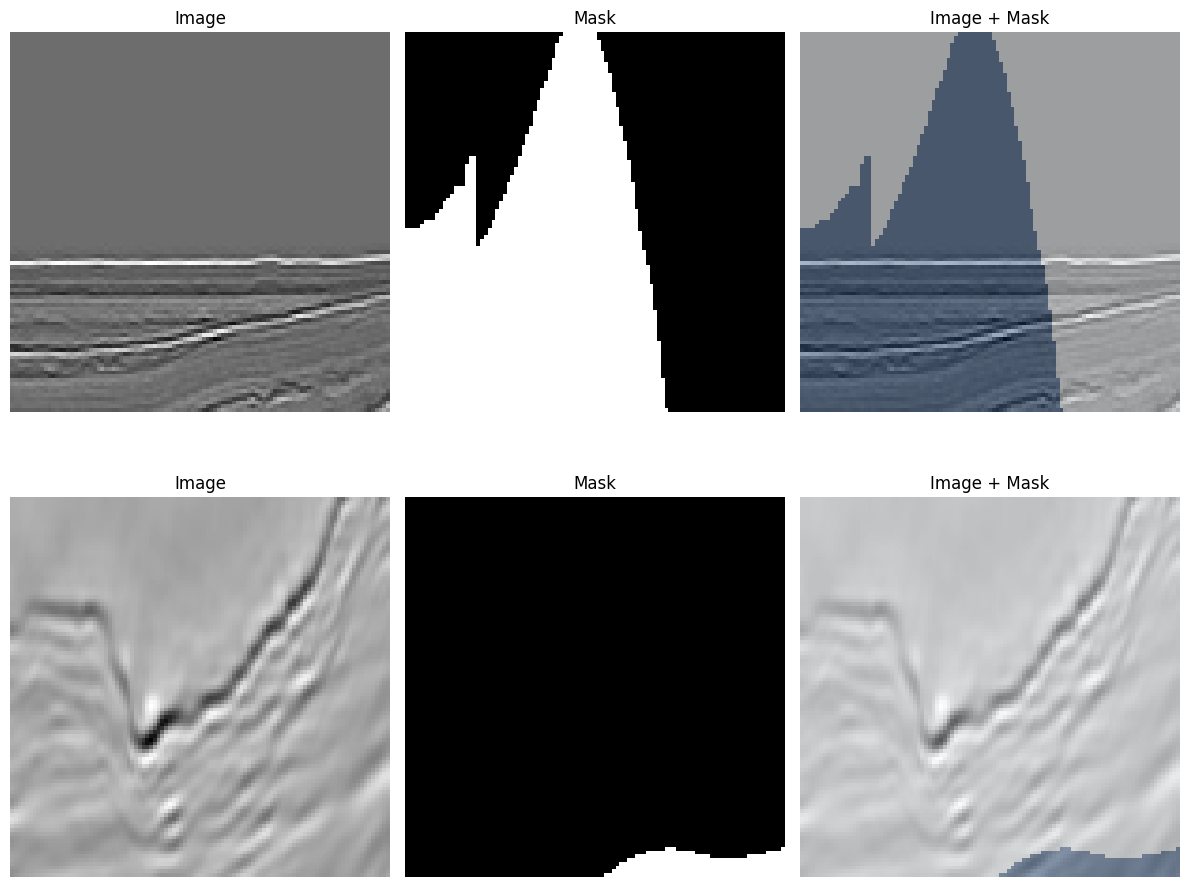

In [7]:


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

for i in range(2):

    r = random.randint(0, len(image_train) - 1)


    image = Image.open(os.path.join(IMAGE_TRAIN_PATH, image_train[r]))
    mask = Image.open(os.path.join(MASK_TRAIN_PATH, mask_train[r]))


    transforms = T.Compose([T.Grayscale(), T.ToTensor()])
    image_tensor = torch.stack([transforms(image)])
    mask_tensor = torch.stack([transforms(mask)])


    ax[i, 0].imshow(image_tensor.squeeze(), cmap='gray')
    ax[i, 0].set_title('Image', loc='center')
    ax[i, 0].axis('off')


    ax[i, 1].imshow(mask_tensor.squeeze(), cmap='gray')
    ax[i, 1].set_title('Mask', loc='center')
    ax[i, 1].axis('off')


    ax[i, 2].imshow(image_tensor.squeeze(), cmap='gray')
    ax[i, 2].imshow(mask_tensor.squeeze(), cmap='Blues', alpha=0.35)
    ax[i, 2].set_title('Image + Mask', loc='center')
    ax[i, 2].axis('off')

plt.tight_layout()
plt.show()

U sledećem koraku napravila sam klasu Segmentation_Dataset kako bih olakšala rad sa podacima za segmentaciju. Preko nje mogu direktno da pristupim pojedinačnim slikama i maskama, a transformacije se automatski primenjuju pri učitavanju. Na taj način podaci su odmah spremni za treniranje modela, bez dodatne obrade.


In [8]:
class Segmentation_Dataset(Dataset):
    def __init__(self, img_path, mask_path):
        self.img_path = img_path
        self.mask_path = mask_path


        mask_files = [os.path.basename(f).replace('.png', '')
                      for f in glob.glob(os.path.join(mask_path, '*.png'))]

        self.samples = []
        for file in glob.glob(os.path.join(img_path, '*.png')):
            name = os.path.basename(file).replace('.png', '')
            if name in mask_files:
                self.samples.append(name)

        self.transforms = T.Compose([
            T.Grayscale(),
            T.ToTensor()
        ])

    def __getitem__(self, idx):
        img_name = self.samples[idx] + '.png'
        image = Image.open(os.path.join(self.img_path, img_name))
        mask = Image.open(os.path.join(self.mask_path, img_name))

        image = self.transforms(image)
        mask = self.transforms(mask)

        return image, mask

    def __len__(self):
        return len(self.samples)


Na osnovu klase Segmentation_Dataset napravila sam train_dataset i u njega dodala putanje do foldera sa slikama i maskama. Na taj način su podaci povezani i spremni za dalje, pa ih mogu odmah proslediti modelu za treniranje.


In [9]:
train_dataset = Segmentation_Dataset(IMAGE_TRAIN_PATH, MASK_TRAIN_PATH)

Na osnovu klase Segmentation_Dataset napravila sam train_dataset i ubacila putanje do foldera sa slikama i maskama. Tako su podaci lepo povezani i odmah spremni za treniranje. Mogu ih direktno proslediti modelu bez dodatne pripreme.


In [10]:
class ConvolutionBlock(nn.Module):
    def __init__(self, in_ch, out_ch, kernel, step=1, use_relu=True):
        super(ConvolutionBlock, self).__init__()

        self.use_relu = use_relu
        self.conv = nn.Conv2d(in_ch, out_ch, kernel, stride=step, padding=kernel // 2)
        self.norm = nn.BatchNorm2d(out_ch)

    def forward(self, x):
        x = self.conv(x)
        x = self.norm(x)

        if self.use_relu:
            x = F.relu(x)

        return x

Napravila sam klasu ResidualBlock koja koristi skip konekciju da prenese informacije direktno sa ulaza na izlaz. Cilj je da mreža ne mora da uči sve od nule, već samo razliku između ulaza i izlaza. To olakšava treniranje i pomaže da se izbegne problem sa nestajanjem gradijenata.


In [11]:
class ResidualBlock(nn.Module):
  def __init__(self, in_ch, out_ch, kernel=3):
    super(ResidualBlock, self).__init__()

    self.norm = nn.BatchNorm2d(in_ch)
    self.conv1 = ConvolutionBlock(in_ch, out_ch, kernel)
    self.conv2 = ConvolutionBlock(out_ch, out_ch, kernel, use_relu=False)

  def forward(self, x):
    residual = x
    x = F.relu(x)
    x = self.norm(x)
    x = self.conv1(x)
    x = self.conv2(x)
    return x + residual

Kod DeconvolutionBlock prvo se povećavaju dimenzije slike pomoću dekonvolucije, a zatim se izlaz iz dekodera spaja sa odgovarajućim slojem iz enkodera. Na ovaj način zadržavam prostorne informacije iz ranijih faza, što mi pomaže da preciznije rekonstruišem masku.

In [12]:
class DeconvolutionBlock(nn.Module):
    def __init__(self, in_ch, out_ch, kernel=2, step=2):
        super(DeconvolutionBlock, self).__init__()

        self.deconv = nn.ConvTranspose2d(
            in_ch, out_ch, kernel_size=kernel, stride=step
        )

    def forward(self, encoder_input, decoder_input):
        upsampled = self.deconv(encoder_input)
        concatenated = torch.cat([upsampled, decoder_input], dim=1)
        return concatenated

Napravila sam UNet klasu koja kombinuje sve ključne blokove: konvolucione, rezidualne i dekonvolucione. Enkoder i dekoder su povezani preko bridge-a, pa mreža može da prepozna objekte i da ih lepo rekonstruiše u maski.



In [13]:
class UNet(nn.Module):
    def __init__(self, base_filters=16, dropout_rate=0.5):
        super(UNet, self).__init__()

        self.down1 = nn.Sequential(
            nn.Conv2d(1, base_filters, 3, padding=1),
            ResidualBlock(base_filters, base_filters),
            ResidualBlock(base_filters, base_filters),
            nn.ReLU()
        )

        self.down2 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_rate / 2),
            nn.Conv2d(base_filters, base_filters * 2, 3, padding=1),
            ResidualBlock(base_filters * 2, base_filters * 2),
            ResidualBlock(base_filters * 2, base_filters * 2),
            nn.ReLU()
        )

        self.down3 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 2, base_filters * 4, 3, padding=1),
            ResidualBlock(base_filters * 4, base_filters * 4),
            ResidualBlock(base_filters * 4, base_filters * 4),
            nn.ReLU()
        )

        self.down4 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 4, base_filters * 8, 3, padding=1),
            ResidualBlock(base_filters * 8, base_filters * 8),
            ResidualBlock(base_filters * 8, base_filters * 8),
            nn.ReLU()
        )

        self.bridge = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 8, base_filters * 16, 3, padding=1),
            ResidualBlock(base_filters * 16, base_filters * 16),
            ResidualBlock(base_filters * 16, base_filters * 16),
            nn.ReLU()
        )

        self.up4 = DeconvolutionBlock(base_filters * 16, base_filters * 8, 2)
        self.upconv4 = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 16, base_filters * 8, 3, padding=1),
            ResidualBlock(base_filters * 8, base_filters * 8),
            ResidualBlock(base_filters * 8, base_filters * 8),
            nn.ReLU()
        )

        self.up3 = DeconvolutionBlock(base_filters * 8, base_filters * 4, 3)
        self.upconv3 = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 8, base_filters * 4, 3, padding=1),
            ResidualBlock(base_filters * 4, base_filters * 4),
            ResidualBlock(base_filters * 4, base_filters * 4),
            nn.ReLU()
        )

        self.up2 = DeconvolutionBlock(base_filters * 4, base_filters * 2, 2)
        self.upconv2 = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 4, base_filters * 2, 3, padding=1),
            ResidualBlock(base_filters * 2, base_filters * 2),
            ResidualBlock(base_filters * 2, base_filters * 2),
            nn.ReLU()
        )

        self.up1 = DeconvolutionBlock(base_filters * 2, base_filters, 3)
        self.upconv1 = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Conv2d(base_filters * 2, base_filters, 3, padding=1),
            ResidualBlock(base_filters, base_filters),
            ResidualBlock(base_filters, base_filters),
            nn.ReLU(),
            nn.Dropout(dropout_rate / 2),
            nn.Conv2d(base_filters, 1, 3, padding=1)
        )

    def forward(self, x):
        d1 = self.down1(x)
        d2 = self.down2(d1)
        d3 = self.down3(d2)
        d4 = self.down4(d3)

        x = self.bridge(d4)

        x = self.up4(x, d4)
        x = self.upconv4(x)

        x = self.up3(x, d3)
        x = self.upconv3(x)

        x = self.up2(x, d2)
        x = self.upconv2(x)

        x = self.up1(x, d1)
        x = self.upconv1(x)

        return x


Napravila sam funkciju iou_metric(preds, masks) da proverim koliko se predikcije poklapaju sa stvarnim maskama. Prvo ih pretvaram u binarni oblik, pa računam odnos preseka i unije. Koristim ovu metriku da vidim koliko dobro model prepoznaje salt oblasti. Što je IoU bliži 1, to je predikcija tačnija.


In [14]:
def iou_metric(preds, masks):
    true_mask = masks.squeeze().bool()

    pred = torch.where(preds < 0., torch.zeros_like(preds), torch.ones_like(preds))
    pred_mask = pred.squeeze().bool()

    intersection = (true_mask & pred_mask).float().sum((1, 2))
    union = (true_mask | pred_mask).float().sum((1, 2))

    iou = (intersection + 1e-6) / (union + 1e-6)
    return iou

Funkcija train_one_batch(model, images, masks) obavlja jednu iteraciju treniranja nad mini-batch-om. U njoj prosleđujem slike i maske modelu, računam loss i pomoću optimizatora ažuriram parametre. Na kraju izračunavam IoU da vidim koliko dobro model prepoznaje salt oblasti.



In [15]:
def train_one_batch(model, images, masks):
    images, masks = images.to(device), masks.to(device)

    preds = model(images)

    loss = loss_fn(preds, masks)
    iou = iou_metric(preds, masks).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return loss.item(), iou.item()

Funkciju elapsed_time(start_time) koristim da izračunam koliko je vremena prošlo od početka treninga. Prikazuje mi ukupno trajanje treniranja ili pojedinačnih iteracija, pa mogu da pratim koliko efikasno model uči.

In [16]:
def elapsed_time(start_time):
    now = time.time()
    duration = now - start_time
    minutes = math.floor(duration / 60)
    seconds = int(duration - minutes * 60)
    return f'{minutes}m {seconds}s'

U ovom delu treniram UNet model na slikama i maskama koje prikazuju oblasti sa i bez soli. Postavljam broj epoha (NUM_EPOCHS = 120) i veličinu batch-a (BATCH_SIZE = 64), inicijalizujem model sa base_filters=8 i dropout_rate=0.3, i prebacujem ga na GPU. Model ide u režim treniranja.
Koristim Adam optimizator i BCEWithLogitsLoss kao funkciju gubitka, a ReduceLROnPlateau kao scheduler koji prilagođava learning rate na osnovu IoU-a. Podatke učitavam pomoću DataLoader-a sa uključenim shuffle-om, drop_last i podešenim brojem radnih niti.
Za svaku epohu prolazim kroz sve batch-eve: slike i maske šaljem na GPU, pa u okviru autocast konteksta računam predikcije, loss i IoU. Loss propagiram unazad pomoću GradScaler-a, a optimizator ažurira parametre.
Za svaki batch prikazujem trenutni loss i IoU, a na kraju epohe računam prosek i prikazujem vreme treniranja pomoću elapsed_time. Scheduler se ažurira na osnovu prosečnog IoU-a, a vrednosti loss-a i IoU-a čuvam u listama train_loss i train_iou da bih pratila napredak.


In [17]:
NUM_EPOCHS = 120
BATCH_SIZE = 64

model = UNet(base_filters=8, dropout_rate=0.3).to(device)
model.train()

optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'max')
loss_fn = nn.BCEWithLogitsLoss()


train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=2,
    pin_memory=True
)

steps = len(train_dataset) // BATCH_SIZE
start = time.time()

train_loss = []
train_iou = []

scaler = torch.amp.GradScaler("cuda")

for epoch in range(1, NUM_EPOCHS + 1):
    print(f"Epoch {epoch}/{NUM_EPOCHS}")

    running_iou = []
    running_loss = []

    for step, (images, masks) in enumerate(train_dataloader):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()

        with torch.amp.autocast("cuda"):
            preds = model(images)
            loss = loss_fn(preds, masks)
            iou = iou_metric(preds, masks).mean()

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_iou.append(iou.item())
        running_loss.append(loss.item())

        print('\r{:6.1f}%\tLoss: {:8.4f}\tIoU: {:8.4f}'.format(
            100 * (step + 1) / steps, loss.item(), iou.item()), end='')

    print('\r{:6.1f}%\tLoss: {:8.4f}\tIoU: {:8.4f}\t{}'.format(
        100 * (step + 1) / steps,
        np.mean(running_loss),
        np.mean(running_iou),
        elapsed_time(start)
    ))

    scheduler.step(np.mean(running_iou))

    train_loss.append(np.mean(running_loss))
    train_iou.append(np.mean(running_iou))


Epoch 1/120
 100.0%	Loss:   0.5465	IoU:   0.1820	0m 6s
Epoch 2/120
 100.0%	Loss:   0.3287	IoU:   0.3064	0m 14s
Epoch 3/120
 100.0%	Loss:   0.2780	IoU:   0.5023	0m 19s
Epoch 4/120
 100.0%	Loss:   0.2393	IoU:   0.5923	0m 26s
Epoch 5/120
 100.0%	Loss:   0.2376	IoU:   0.6125	0m 33s
Epoch 6/120
 100.0%	Loss:   0.2143	IoU:   0.6358	0m 39s
Epoch 7/120
 100.0%	Loss:   0.2045	IoU:   0.6644	0m 46s
Epoch 8/120
 100.0%	Loss:   0.1924	IoU:   0.6862	0m 52s
Epoch 9/120
 100.0%	Loss:   0.1798	IoU:   0.6899	0m 59s
Epoch 10/120
 100.0%	Loss:   0.1756	IoU:   0.6992	1m 5s
Epoch 11/120
 100.0%	Loss:   0.1676	IoU:   0.7076	1m 13s
Epoch 12/120
 100.0%	Loss:   0.1704	IoU:   0.7041	1m 19s
Epoch 13/120
 100.0%	Loss:   0.1631	IoU:   0.7034	1m 26s
Epoch 14/120
 100.0%	Loss:   0.1550	IoU:   0.7255	1m 32s
Epoch 15/120
 100.0%	Loss:   0.1502	IoU:   0.7307	1m 39s
Epoch 16/120
 100.0%	Loss:   0.1478	IoU:   0.7320	1m 45s
Epoch 17/120
 100.0%	Loss:   0.1487	IoU:   0.7257	1m 53s
Epoch 18/120
 100.0%	Loss:   0.1474	IoU:  

Nakon 120 epoha treniranja, posmatrala sam grafik koji prikazuje kako su se menjali gubitak (Loss) i IoU metrika tokom vremena. Gubitak se postepeno smanjivao od oko 0.46 na početku do približno 0.05 na kraju, dok je IoU rastao sa 0.15 na početku do oko 0.84.
Ovakav trend pokazuje da model uspešno uči da prepoznaje oblasti sa solju i da je treniranje bilo stabilno. IoU iznad 0.8 znači da je segmentacija prilično tačna, ali ima prostora za dodatna poboljšanja. Rezultati bi mogli biti još bolji ako se produži treniranje ili poveća broj filtera u mreži


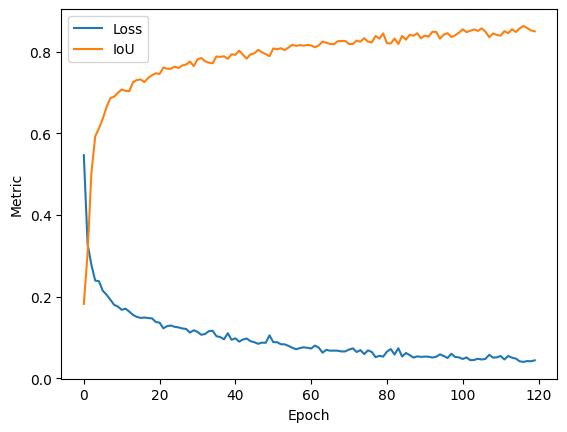

In [18]:
plt.plot(train_loss, label='Loss')
plt.plot(train_iou, label='IoU')

plt.xlabel('Epoch')
plt.ylabel('Metric')

plt.legend()
plt.show()


In [19]:
torch.save(model.cpu().state_dict(), '/content/drive/MyDrive/Salt_Segmentation/unet_model.pth')

Prikazujem nekoliko primera iz trening skupa sa stvarnim i predviđenim maskama, uz pripadajuću IoU vrednost. Da bi se lakše razlikovale, prava maska je označena plavom, a predikcija crvenom bojom.

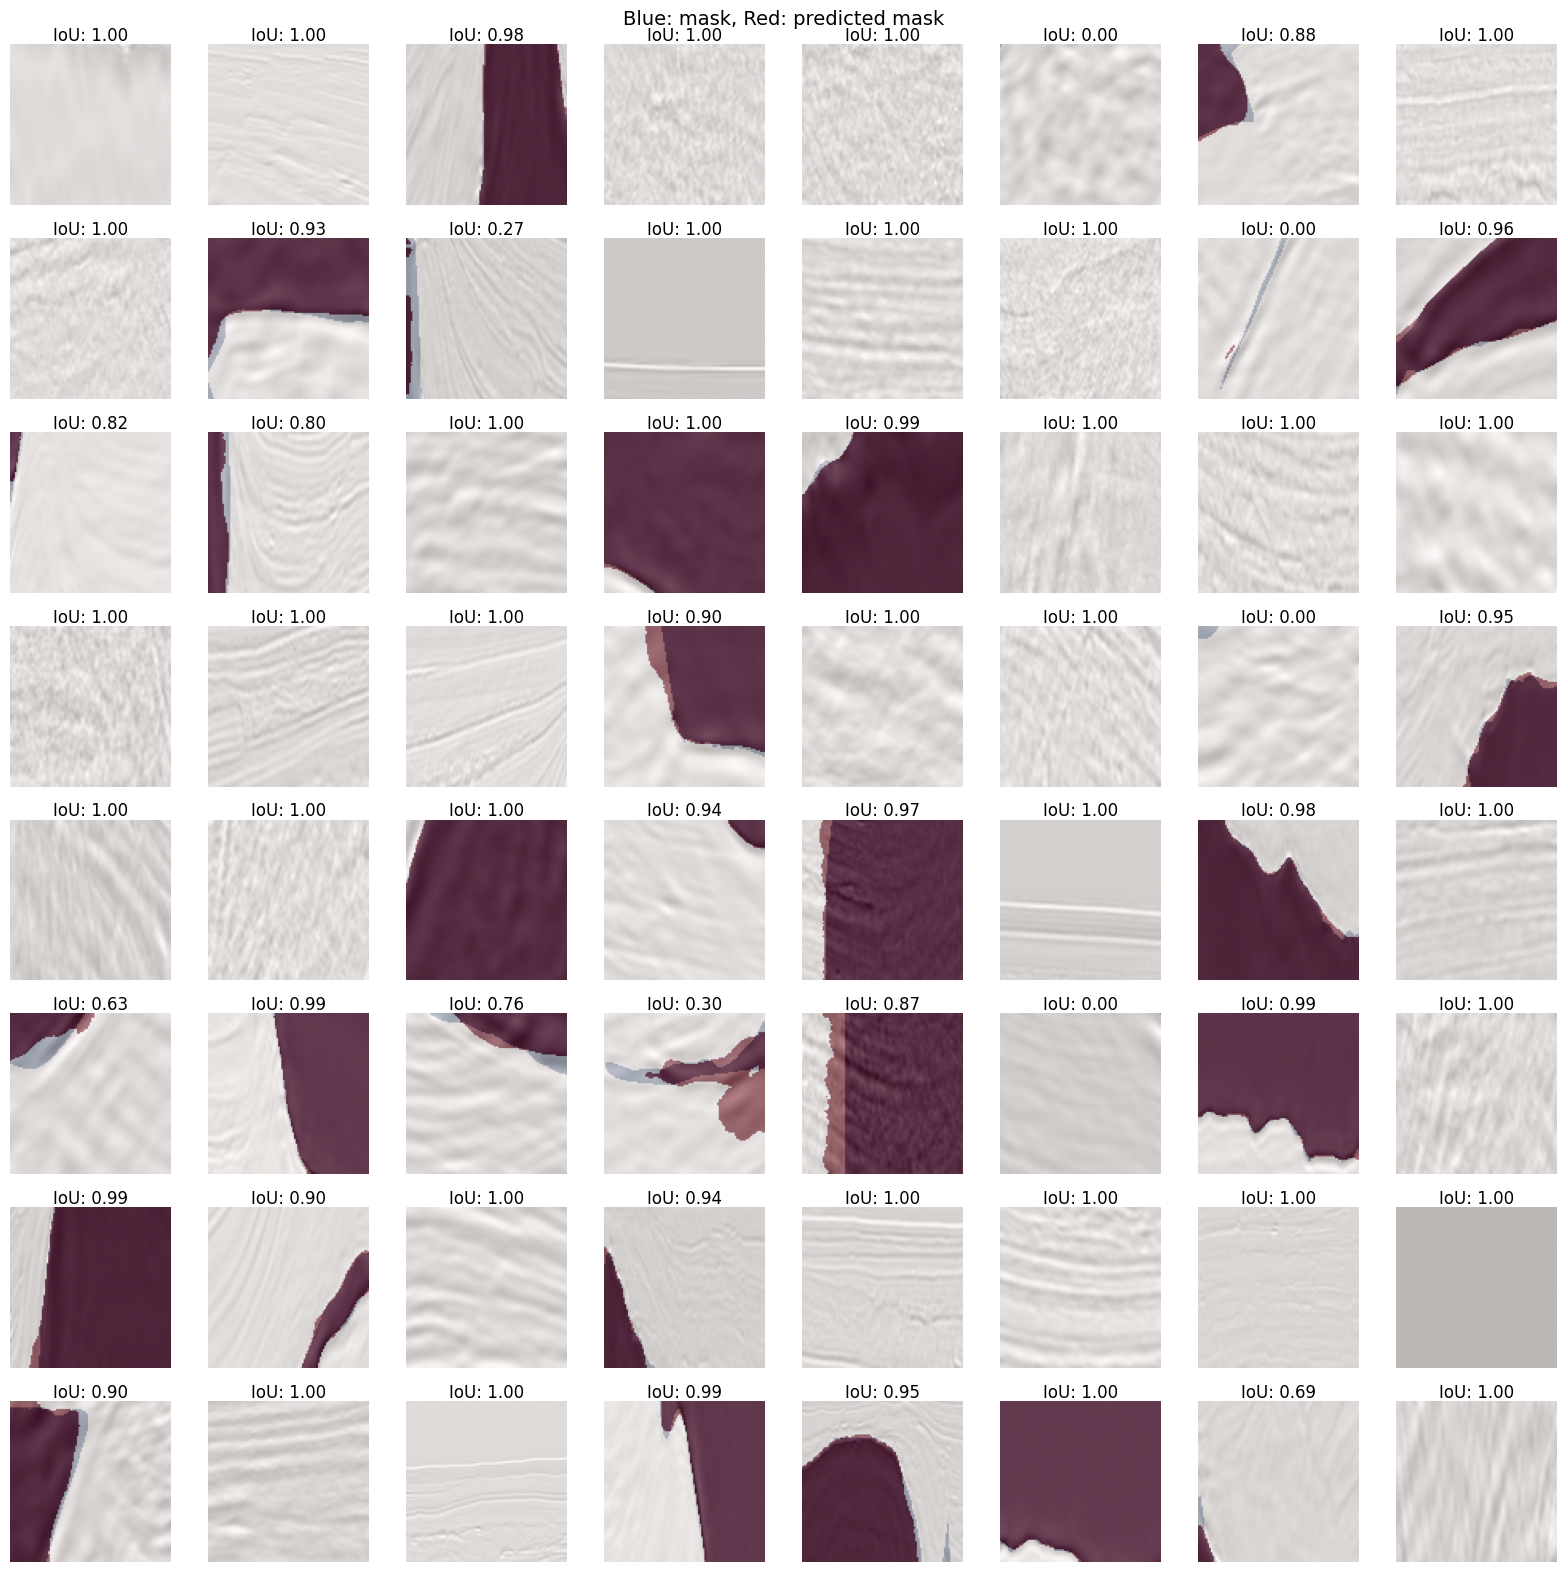

In [20]:
train_iter = iter(train_dataloader)
images, masks = next(train_iter)


model = model.to(device)
model.eval()


with torch.no_grad():
    output = model(images.to(device)).cpu()


pred = torch.where(output < 0., torch.zeros_like(output), torch.ones_like(output))


ious = iou_metric(output, masks).numpy()


max_images = output.size(0)
grid_width = 8
grid_height = int(np.ceil(max_images / grid_width))

fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width * 2, grid_height * 2))

for i, (image, mask, prediction, iou) in enumerate(zip(images, masks, pred, ious)):
    ax = axs[i // grid_width, i % grid_width]

    ax.imshow(image.squeeze(), cmap='gray')
    ax.imshow(mask.squeeze(), cmap='Blues', alpha=0.5)
    ax.imshow(prediction.squeeze(), cmap='Reds', alpha=0.5)
    ax.set_title(f"IoU: {iou:.2f}", loc='center', pad=-5)
    ax.axis('off')

plt.suptitle('Blue: mask, Red: predicted mask', fontsize=14)
plt.tight_layout()
plt.show()


Nakon treniranja i evaluacije, sledeći korak je testiranje. U ovom delu definišem funkciju rle_encode(im) koja služi za enkodiranje maske u RLE format. Ulazna maska se pretvara u jednodimenzionalni niz piksela, pa se zatim pronalaze uzastopni pikseli sa istom vrednošću i računa se njihova dužina. Na kraju se vraća string koji predstavlja RLE kodiranje.
Ova funkcija mi omogućava da kompresujem maske i sačuvam informacije o prisutnosti objekata na efikasan način. U kodu se nalazi i definicija objekta transforms, koji primenjuje transformacije na slikama uključujući konverziju u grayscale i pretvaranje u tensor.


In [21]:

def rle_encode(mask):

    pixels = mask.flatten(order='F')
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)


transforms = T.Compose([
    T.Grayscale(),
    T.ToTensor()
])


Ovaj deo koda prolazi kroz svaki red u fajlu SAMPLE_SUBMISSION_PATH.
Za svaki id učitavam odgovarajuću sliku iz test skupa tako što spajam putanju IMAGE_TEST_PATH sa imenom fajla.
Na sliku primenjujem transformacije i šaljem je modelu da napravi predikciju.
Na izlazu primenjujem prag da dobijem binarnu masku pred_mask, pa je pretvaram u RLE format pomoću rle_encode.
Dobijeni string dodajem u listu rle_masks.
Na kraju dodajem novu kolonu 'rle_mask' u DataFrame submission_df, koja sadrži sve kodirane maske spremne za predaju.

In [22]:
submission_df = pd.read_csv(SAMPLE_SUBMISSION_PATH)


num_samples = submission_df.shape[0]

rle_masks = []

model.eval()

for index in range(num_samples):
    image_id = submission_df['id'][index]

    image_path = os.path.join(IMAGE_TEST_PATH, f"{image_id}.png")
    image = Image.open(image_path)
    image = transforms(image).unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image).cpu().squeeze()

    pred_mask = torch.where(prediction < 0., torch.zeros_like(prediction), torch.ones_like(prediction))

    rle_masks.append(rle_encode(pred_mask.numpy()))

submission_df['rle_mask'] = rle_masks

print(submission_df.head())


           id                                           rle_mask
0  155410d6fa  1 908 910 98 1011 97 1112 96 1213 95 1314 95 1...
1  78b32781d1  59 43 159 44 259 45 358 47 457 49 556 51 656 5...
2  63db2a476a  2626 1 2726 2 2824 2 2827 2 2925 2 2928 2 3026...
3  17bfcdb967            4546 7 4562 7 4647 53 4711 18 4732 5470
4  7ea0fd3c88                                                   


Na kraju koda koristim to_csv() metodu da sačuvam rezultate u CSV fajl. U fajlu „submission.csv“ nalaze se RLE-kodirane maske u koloni rle_mask, a pošto sam postavila index=False, indeksi se ne upisuju u fajl. Tako dobijam čist CSV koji je spreman za predaju ili dalju analizu.


In [23]:
submission_df.to_csv('/content/drive/MyDrive/Salt_Segmentation/submission.csv', index=False)